In [163]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [164]:
df = pd.read_csv('energy_dataset.csv.zip')
df.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [165]:
df.describe()

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
count,35045.000000,35046.000000,35046.0,35046.000000,35046.000000,35045.000000,35046.0,35046.0,35046.0,0.0,...,35045.000000,35046.0,35046.000000,35064.000000,0.0,35064.000000,35064.000000,35028.000000,35064.000000,35064.000000
mean,383.513540,448.059208,0.0,5622.737488,4256.065742,298.319789,0.0,0.0,0.0,NaN,...,269.452133,0.0,5464.479769,1439.066735,NaN,5471.216689,28712.129962,28696.939905,49.874341,57.884023
std,85.353943,354.568590,0.0,2201.830478,1961.601013,52.520673,0.0,0.0,0.0,NaN,...,50.195536,0.0,3213.691587,1677.703355,NaN,3176.312853,4594.100854,4574.987950,14.618900,14.204083
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,...,0.000000,0.0,0.000000,0.000000,NaN,237.000000,18105.000000,18041.000000,2.060000,9.330000
25%,333.000000,0.000000,0.0,4126.000000,2527.000000,263.000000,0.0,0.0,0.0,NaN,...,240.000000,0.0,2933.000000,69.000000,NaN,2979.000000,24793.750000,24807.750000,41.490000,49.347500
50%,367.000000,509.000000,0.0,4969.000000,4474.000000,300.000000,0.0,0.0,0.0,NaN,...,279.000000,0.0,4849.000000,576.000000,NaN,4855.000000,28906.000000,28901.000000,50.520000,58.020000
75%,433.000000,757.000000,0.0,6429.000000,5838.750000,330.000000,0.0,0.0,0.0,NaN,...,310.000000,0.0,7398.000000,2636.000000,NaN,7353.000000,32263.250000,32192.000000,60.530000,68.010000
max,592.000000,999.000000,0.0,20034.000000,8359.000000,449.000000,0.0,0.0,0.0,NaN,...,357.000000,0.0,17436.000000,5836.000000,NaN,17430.000000,41390.000000,41015.000000,101.990000,116.800000


In [166]:
colunas_usar = []
for i in df.columns:
    if 'generation' in i:
        colunas_usar.append(i)
    elif i == 'total load actual':
        colunas_usar.append(i)
    elif i == 'time':
        colunas_usar.append(i)

df = df[colunas_usar]
df.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,total load actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,25385.0
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,1658.0,0.0,7096.0,43.0,71.0,50.0,195.0,0.0,5890.0,24382.0
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,1371.0,0.0,7099.0,43.0,73.0,50.0,196.0,0.0,5461.0,22734.0
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,779.0,0.0,7098.0,43.0,75.0,50.0,191.0,0.0,5238.0,21286.0
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,720.0,0.0,7097.0,43.0,74.0,42.0,189.0,0.0,4935.0,20264.0


In [167]:
info = df.describe().T
colunas_zeradas = list(info.loc[((info['min'] == 0) & (info['max'] == 0)) | (info['min'].isna()) & (info['max'].isna())].index)

df = df.drop(colunas_zeradas, axis = 1)
df.set_index('time', inplace = True)
df.head()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,total load actual
time,,,,,,,,,,,,,,,
2015-01-01 00:00:00+01:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,25385.0
2015-01-01 01:00:00+01:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,24382.0
2015-01-01 02:00:00+01:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,22734.0
2015-01-01 03:00:00+01:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,21286.0
2015-01-01 04:00:00+01:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,20264.0


Text(0.5, 0, '')

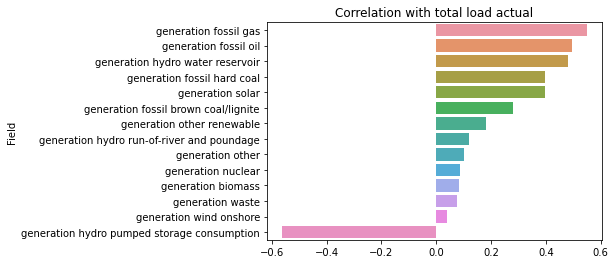

In [168]:
correlations = df.corr()['total load actual'].reset_index()[:-1]
ax = sns.barplot(x = 'total load actual', y = 'index', data = correlations.sort_values(ascending= False, by = 'total load actual'))
ax.set_title('Correlation with total load actual')
ax.set_ylabel('Field')
ax.set_xlabel('')

In [169]:
df.describe()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,total load actual
count,35045.000000,35046.000000,35046.000000,35046.000000,35045.000000,35045.000000,35045.000000,35046.000000,35047.000000,35046.000000,35046.000000,35046.000000,35045.000000,35046.000000,35028.000000
mean,383.513540,448.059208,5622.737488,4256.065742,298.319789,475.577343,972.116108,2605.114735,6263.907039,60.228585,85.639702,1432.665925,269.452133,5464.479769,28696.939905
std,85.353943,354.568590,2201.830478,1961.601013,52.520673,792.406614,400.777536,1835.199745,839.667958,20.238381,14.077554,1680.119887,50.195536,3213.691587,4574.987950
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18041.000000
25%,333.000000,0.000000,4126.000000,2527.000000,263.000000,0.000000,637.000000,1077.250000,5760.000000,53.000000,73.000000,71.000000,240.000000,2933.000000,24807.750000
50%,367.000000,509.000000,4969.000000,4474.000000,300.000000,68.000000,906.000000,2164.000000,6566.000000,57.000000,88.000000,616.000000,279.000000,4849.000000,28901.000000
75%,433.000000,757.000000,6429.000000,5838.750000,330.000000,616.000000,1250.000000,3757.000000,7025.000000,80.000000,97.000000,2578.000000,310.000000,7398.000000,32192.000000
max,592.000000,999.000000,20034.000000,8359.000000,449.000000,4523.000000,2000.000000,9728.000000,7117.000000,106.000000,119.000000,5792.000000,357.000000,17436.000000,41015.000000


<AxesSubplot: xlabel='time', ylabel='total load actual'>

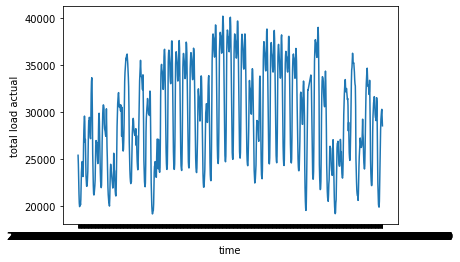

In [170]:
sns.lineplot(x = 'time', y = 'total load actual', data = df.iloc[:1000])

In [171]:
df.reset_index(inplace = True)
df.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,total load actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,25385.0
1,2015-01-01 01:00:00+01:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,24382.0
2,2015-01-01 02:00:00+01:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,22734.0
3,2015-01-01 03:00:00+01:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,21286.0
4,2015-01-01 04:00:00+01:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,20264.0


## Creating time series columns

In [172]:
df['time'] = pd.to_datetime(df['time'], utc = True)


df['month'] = df['time'].dt.month
df['year'] = df['time'].dt.year
df['dayofweek'] = df['time'].dt.dayofweek
df['hour'] = df['time'].dt.hour
df['day'] = df['time'].dt.day

In [173]:
df.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,...,generation other renewable,generation solar,generation waste,generation wind onshore,total load actual,month,year,dayofweek,hour,day
0,2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,...,73.0,49.0,196.0,6378.0,25385.0,12,2014,2,23,31
1,2015-01-01 00:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,...,71.0,50.0,195.0,5890.0,24382.0,1,2015,3,0,1
2,2015-01-01 01:00:00+00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,...,73.0,50.0,196.0,5461.0,22734.0,1,2015,3,1,1
3,2015-01-01 02:00:00+00:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,...,75.0,50.0,191.0,5238.0,21286.0,1,2015,3,2,1
4,2015-01-01 03:00:00+00:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,...,74.0,42.0,189.0,4935.0,20264.0,1,2015,3,3,1


## different types of generations through days of week

In [174]:
df_dweek = df.groupby('dayofweek').mean().reset_index()
df_dweek.head()

,dayofweek,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,total load actual,month,year,hour,day
0,0,384.470330,449.547852,5831.531269,4319.416184,302.054357,428.792408,977.526873,2737.793007,6242.286314,60.277323,84.015584,1441.975824,268.929670,5463.961239,29127.054346,6.496510,2016.506879,11.497707,15.748156
1,1,382.418954,485.881587,5961.198557,4532.307954,309.860148,403.624123,982.074735,2697.071729,6253.797035,60.868964,85.432979,1426.807053,268.475255,5398.886796,29465.627581,6.500000,2016.500000,11.500000,15.802885
2,2,383.784927,491.241483,6050.055711,4580.431463,313.506012,372.859519,979.826052,2742.989379,6296.668938,60.378557,86.631663,1440.461323,268.161956,5463.119639,29736.304871,6.534749,2016.499499,11.502303,15.781895
3,3,384.394296,474.160152,5972.448544,4429.594535,310.525130,385.173349,983.561627,2747.718389,6297.459114,60.861588,87.487236,1459.501197,267.312724,5322.483446,29451.323295,6.540670,2016.492823,11.500000,15.688995
4,4,386.519442,485.663609,5842.576869,4425.906680,313.150548,387.479561,977.726620,2712.745962,6271.330409,60.172283,88.080957,1432.450847,271.023729,5337.061615,29346.252344,6.516746,2016.497608,11.500000,15.665072


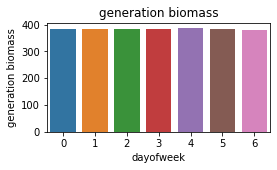

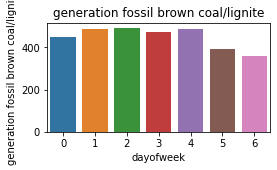

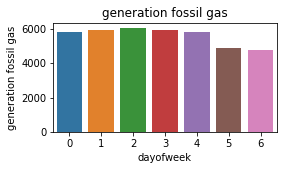

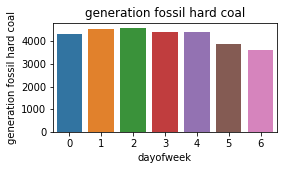

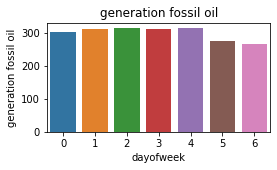

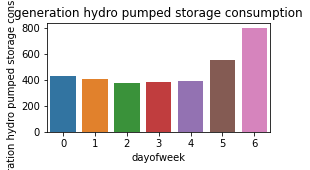

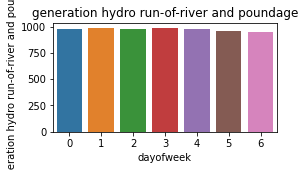

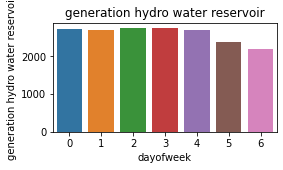

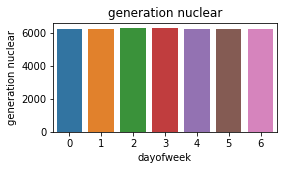

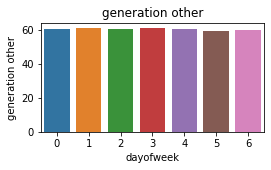

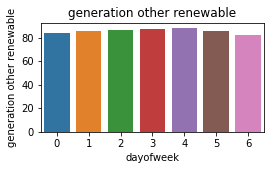

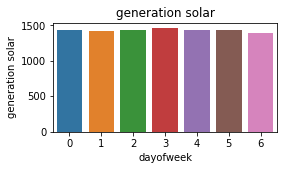

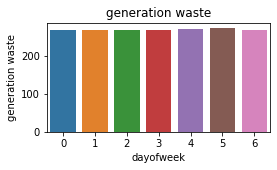

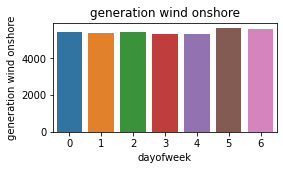

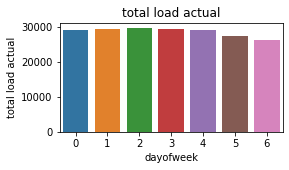

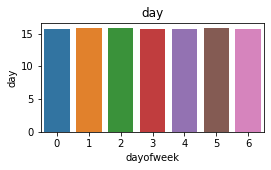

In [175]:
df_dweek = df_dweek.drop(['month', 'year', 'hour'], axis = 1)

for i in df_dweek.columns[1:]:
    plt.figure(i).set_size_inches((4,2))
    ax = sns.barplot(y = i, x = 'dayofweek', data = df_dweek)
    ax.set_title(i)

In [176]:
df_month = df.groupby('month').mean().reset_index()
df_month = df_month.drop(['dayofweek', 'year', 'hour'], axis = 1)


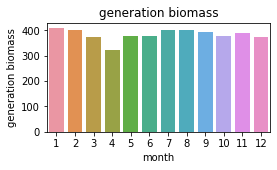

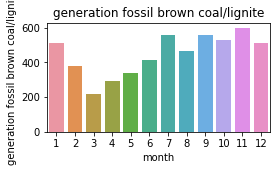

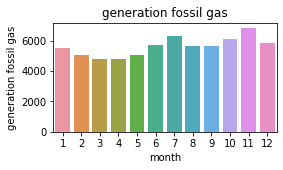

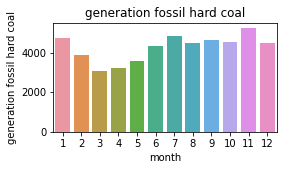

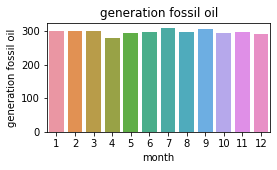

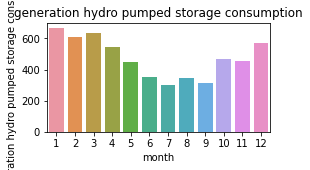

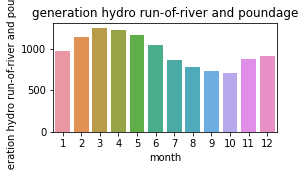

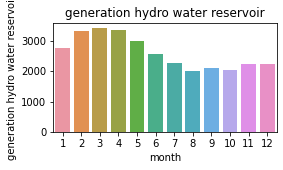

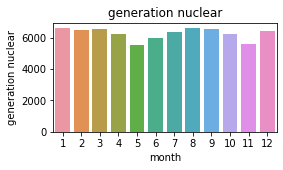

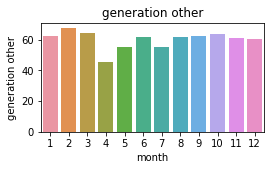

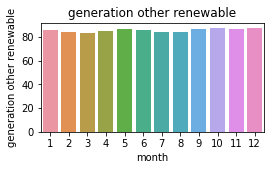

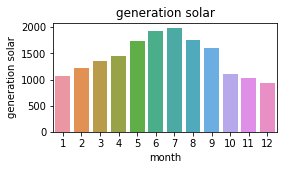

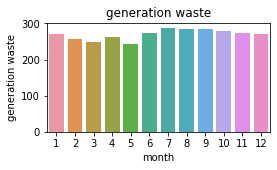

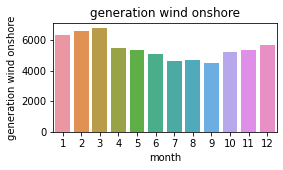

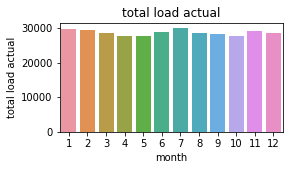

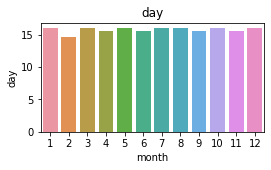

In [177]:
for i in df_month.columns[1:]:
    plt.figure(i).set_size_inches((4,2))
    ax = sns.barplot(y = i, x = 'month', data = df_month)
    ax.set_title(i)

In [178]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

df.time = df.time.dt.date
df.set_index('time', inplace = True)
cal = calendar()

holidays = cal.holidays(start=df.index.min(),
                        end=datetime.date(2030, 12, 31),
                        return_name=True)
holiday_df = pd.DataFrame(data=holidays,
                          columns=['holiday'])
holiday_df = holiday_df.reset_index().rename(columns={'index':'ds'})
holiday_df.set_index('ds', inplace = True)
holiday_df['isholiday'] = True
df = df.join(holiday_df)
df['isholiday'] = df['isholiday'].fillna(False)
holiday_df.head()

,holiday,isholiday
ds,,
2015-01-01,New Year's Day,True
2015-01-19,"Birthday of Martin Luther King, Jr.",True
2015-02-16,Washington’s Birthday,True
2015-05-25,Memorial Day,True
2015-07-03,Independence Day,True


In [180]:
df = df[['year', 'month', 'day', 'dayofweek', 'hour', 'isholiday','total load actual']]
df['MA_7H' ] = df['total load actual'].copy().rolling(7).mean()
df['MA_30H' ] = df['total load actual'].copy().rolling(30).mean()
df.dropna(inplace = True)
df.head()

,year,month,day,dayofweek,hour,isholiday,total load actual,MA_7H,MA_30H
2015-01-02,2015,1,2,4,4,False,22066.0,24102.714286,23848.100000
2015-01-02,2015,1,2,4,5,False,22275.0,23456.571429,23744.433333
2015-01-02,2015,1,2,4,6,False,23025.0,22878.714286,23699.200000
2015-01-02,2015,1,2,4,7,False,23699.0,22702.142857,23731.366667
2015-01-02,2015,1,2,4,8,False,25834.0,23076.428571,23882.966667


Text(0.5, 0, '')

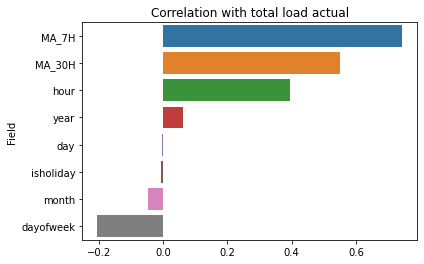

In [181]:
correlations = df.corr()['total load actual'].reset_index()
ax = sns.barplot(x = 'total load actual', y = 'index', data = correlations.sort_values(ascending= False, by = 'total load actual')[1:])
ax.set_title('Correlation with total load actual')
ax.set_ylabel('Field')
ax.set_xlabel('')

In [182]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [183]:
x = df.drop('total load actual', axis = 1)
y = df['total load actual']
test_size = 0.2
data_size = len(x)
x_train = x[:(int(data_size * (1-test_size)))]
x_test = x[(int(data_size * (1-test_size))):]
y_train = y[:(int(data_size * (1-test_size)))]
y_test = y[(int(data_size * (1-test_size))):]

In [184]:
params = {'early_stopping_rounds': 50, 'learning_rate': 0.10689390777863539, 'max_depth': 8, 'min_impurity_decrease': 0.23007525972178955, 
            'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 15000, 'subsample': 0.8884636554802767}
model = XGBRegressor(**params)
model.fit(x_train, y_train,
          eval_set=[(x_train, y_train), (x_test, y_test)],
          verbose=100)

y_pred = model.predict(x_test)

[17:05:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } are not used.

[0]	validation_0-rmse:25925.20758	validation_1-rmse:26080.13731
[100]	validation_0-rmse:446.84593	validation_1-rmse:654.49581
[200]	validation_0-rmse:337.26632	validation_1-rmse:637.19757
[300]	validation_0-rmse:272.26260	validation_1-rmse:632.71343
[383]	validation_0-rmse:232.33037	validation_1-rmse:631.00234


In [185]:
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = model.score(x_test, y_test)

In [186]:
print("R²: %.2f" % r2)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))
print("MAPE: %.2f" % (mape * 100) + '%')

R²: 0.98
MSE: 398077.51
RMSE: 630.93
MAPE: 1.52%


In [187]:
df['real/forecast'] = 'real'
df.head()

,year,month,day,dayofweek,hour,isholiday,total load actual,MA_7H,MA_30H,real/forecast
2015-01-02,2015,1,2,4,4,False,22066.0,24102.714286,23848.100000,real
2015-01-02,2015,1,2,4,5,False,22275.0,23456.571429,23744.433333,real
2015-01-02,2015,1,2,4,6,False,23025.0,22878.714286,23699.200000,real
2015-01-02,2015,1,2,4,7,False,23699.0,22702.142857,23731.366667,real
2015-01-02,2015,1,2,4,8,False,25834.0,23076.428571,23882.966667,real


In [188]:
x_train

,year,month,day,dayofweek,hour,isholiday,MA_7H,MA_30H
2015-01-02,2015,1,2,4,4,False,24102.714286,23848.100000
2015-01-02,2015,1,2,4,5,False,23456.571429,23744.433333
2015-01-02,2015,1,2,4,6,False,22878.714286,23699.200000
2015-01-02,2015,1,2,4,7,False,22702.142857,23731.366667
2015-01-02,2015,1,2,4,8,False,23076.428571,23882.966667
...,...,...,...,...,...,...,...,...
2018-03-17,2018,3,17,5,0,False,31001.571429,30823.200000
2018-03-17,2018,3,17,5,1,False,29712.285714,30447.033333
2018-03-17,2018,3,17,5,2,False,28124.285714,30078.000000
2018-03-17,2018,3,17,5,3,False,26582.714286,29774.500000


In [189]:
import calendar
year = 2019
dayofweek = 0
for month in range(1, 13):
    for day in range(1, calendar.monthrange(year, month)[1] + 1):
        if holiday_df.loc[holiday_df.index == datetime.date(year, month, day)].notnull:
            isholiday = True
        else:
            isholiday = False
        if dayofweek == 6:
            dayofweek = 0
        else:
            dayofweek += 1
        for hour in range(24):
            MA_7H = df['total load actual'][-7:].mean()
            MA_30H = df['total load actual'][-30:].mean()
            ponto = pd.DataFrame({'year':[year], 'month':[month], 'day':[day], 'dayofweek':[dayofweek], 'hour': [hour],  'isholiday': [isholiday], 'MA_7H':[MA_7H],
                       'MA_30H' : [MA_30H]})
            predicao = model.predict(ponto)
            df = df.append({'year':year, 'month':month, 'day':day, 'dayofweek':dayofweek, 'hour': hour, 'MA_7H':MA_7H,
                    'MA_30H': MA_30H, 'real/forecast': 'forecast', 'isholiday': isholiday, 'total load actual':predicao[0]}, ignore_index = True)

In [190]:
df.tail()

,year,month,day,dayofweek,hour,isholiday,total load actual,MA_7H,MA_30H,real/forecast
43221,2019,12,31,1,19,True,34018.250000,32320.630022,30684.464974,forecast
43222,2019,12,31,1,20,True,32353.244141,32546.651786,30754.659896,forecast
43223,2019,12,31,1,21,True,30159.720703,32619.764230,30783.615625,forecast
43224,2019,12,31,1,22,True,27734.710938,32457.316127,30740.844661,forecast
43225,2019,12,31,1,23,True,25268.322266,31955.875000,30590.542383,forecast


In [191]:
df.loc[df['real/forecast'] == 'real'].tail(5)

,year,month,day,dayofweek,hour,isholiday,total load actual,MA_7H,MA_30H,real/forecast
34461,2018,12,31,0,18,False,30653.0,28152.142857,26374.866667,real
34462,2018,12,31,0,19,False,29735.0,28309.142857,26457.233333,real
34463,2018,12,31,0,20,False,28071.0,28321.000000,26526.200000,real
34464,2018,12,31,0,21,False,25801.0,28148.428571,26542.466667,real
34465,2018,12,31,0,22,False,24455.0,27863.571429,26505.900000,real


In [192]:
df.loc[df['real/forecast'] == 'forecast'].head(5)

,year,month,day,dayofweek,hour,isholiday,total load actual,MA_7H,MA_30H,real/forecast
34466,2019,1,1,1,0,True,22951.466797,27863.571429,26505.900000,forecast
34467,2019,1,1,1,1,True,22343.746094,27322.638114,26335.215560,forecast
34468,2019,1,1,1,2,True,22154.027344,26287.173270,26105.973763,forecast
34469,2019,1,1,1,3,True,21755.753906,25073.034319,25843.041341,forecast
34470,2019,1,1,1,4,True,21300.552734,23933.142020,25560.599805,forecast


In [193]:
def cria_timestamp(df):
    return datetime.datetime(int(df['year']), int(df['month']), int(df['day']), int(df['hour']))

In [194]:
df['timestamp'] = df.apply(lambda x: cria_timestamp(x), axis = 1)
df.head()

,year,month,day,dayofweek,hour,isholiday,total load actual,MA_7H,MA_30H,real/forecast,timestamp
0,2015,1,2,4,4,False,22066.0,24102.714286,23848.100000,real,2015-01-02 04:00:00
1,2015,1,2,4,5,False,22275.0,23456.571429,23744.433333,real,2015-01-02 05:00:00
2,2015,1,2,4,6,False,23025.0,22878.714286,23699.200000,real,2015-01-02 06:00:00
3,2015,1,2,4,7,False,23699.0,22702.142857,23731.366667,real,2015-01-02 07:00:00
4,2015,1,2,4,8,False,25834.0,23076.428571,23882.966667,real,2015-01-02 08:00:00


KeyboardInterrupt: 

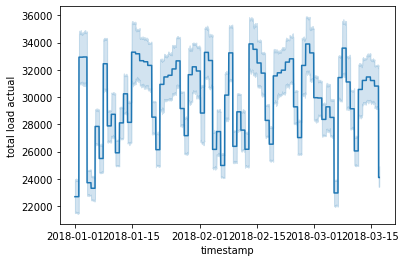

In [195]:
test_data = x_test.merge(y_test, left_index = True, right_index = True)
test_data['timestamp'] = test_data.apply(lambda x: cria_timestamp(x), axis = 1)
test_data['predicted'] = model.predict(test_data.drop(['total load actual', 'timestamp'], axis = 1))
x_train = x_train.merge(y_train, left_index = True, right_index = True)
x_train['timestamp'] = x_train.apply(lambda x: cria_timestamp(x), axis = 1)
sns.lineplot(x = 'timestamp', y = 'total load actual', data = x_train.loc[x_train['timestamp'] >= '2018-01-01 00:00:00'])
sns.lineplot(x = 'timestamp', y = 'total load actual', data = test_data)
sns.lineplot(x = 'timestamp', y = 'predicted', data = test_data)

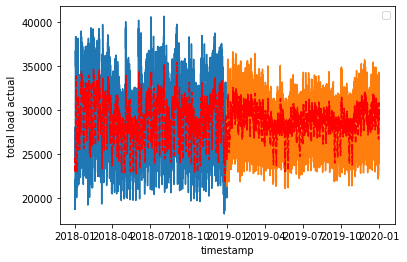

In [196]:
ax = sns.lineplot(data = df.loc[df.timestamp >= '2018-01-01 00:00:00'], y = 'total load actual', x = 'timestamp', hue = 'real/forecast')

sns.lineplot(data = df.loc[df.timestamp >= '2018-01-01 00:00:00'], y = 'MA_30H', x = 'timestamp', linestyle = '--', color = 'r')
ax.legend([])

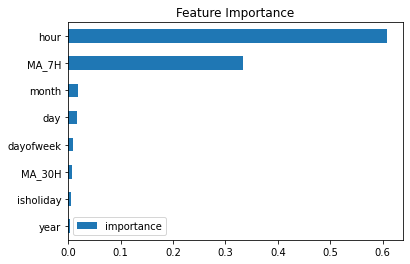

In [197]:
fi = pd.DataFrame(data=model.feature_importances_,
             index=x_train.drop(['timestamp', 'total load actual'], axis = 1).columns,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

In [198]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

parameters = {
        'learning_rate': sp_randFloat(),
        'subsample'    : sp_randFloat(),
        'n_estimators' : sp_randInt(100, 1000),
        'max_depth'    : sp_randInt(4, 10),
        "n_estimators":[5,50,250,500,1000,2000],
        'early_stopping_rounds': [50],
        'min_impurity_decrease': sp_randFloat(),
        'min_samples_leaf': sp_randInt(5,100),
        'min_samples_split': sp_randInt(5,100)
}

randm_src = RandomizedSearchCV(estimator=model, param_distributions = parameters,
                               n_iter = 30, n_jobs=-1)
randm_src.fit(x_train, y_train,
              eval_set=[(x_train, y_train), (x_test, y_test)])

print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", randm_src.best_estimator_)
print("\n The best score across ALL searched params:\n", randm_src.best_score_)
print("\n The best parameters across ALL searched params:\n", randm_src.best_params_)

ValueError: Found input variables with inconsistent numbers of samples: [658450, 27572]

In [199]:
model.save_model('model.json')